# Data Set Information:

### Concerns housing values in suburbs of Boston.

### Data source and further documentation can be found at https://archive.ics.uci.edu/ml/datasets/Housing


### Attribute Information:


1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 dollars
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000's

The data in boston_housing_data.csv file represents housing data from the boston area in 1993.  Each row in the data represents the aggregated housing data at the neighborhood level of granularity.

In [1]:
import pandas as pd

In [2]:
boston_housing_df = pd.read_csv('boston_housing_data.csv', 
                                sep = ',',
                                names = ('CRIM','ZN','INDUS','CHAS'
                                         ,'NOX','RM' ,'AGE','DIS',
                                         'RAD','TAX','PTRATIO','B','LSTAT','MEDV'))

In [3]:
boston_housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
'Median home value: $' + str(1000*boston_housing_df['MEDV'].median())[:8]


'Median home value: $21200.0'

In [56]:
'Average home value: $' + str(1000*boston_housing_df['MEDV'].mean())[:8]

'Average home value: $22532.80'

The average home value is slightly higher than the median.  This tells us that there is a fairly normal distribution of housing prices in the boston area.

In [14]:
import matplotlib.pyplot as plt

In [58]:
#The following commands will create filtered dataframes depending on whether each area is close to Charles River.

river_bound = boston_housing_df[boston_housing_df['CHAS']==1]
non_river_bound = boston_housing_df[boston_housing_df['CHAS']==0]


Let's see how crime rate relates to pupil:teacher ratio in each dataframe created previously.

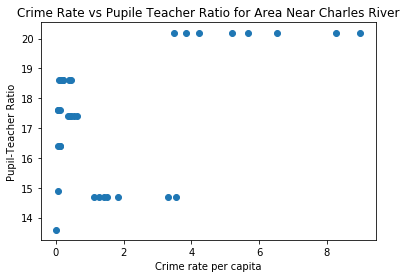

In [52]:
plt.scatter(river_bound['CRIM'], river_bound['PTRATIO'])
plt.title('Crime Rate vs Pupile Teacher Ratio for Areas Near Charles River')
plt.xlabel('Crime rate per capita')
plt.ylabel('Pupil-Teacher Ratio')
plt.show()

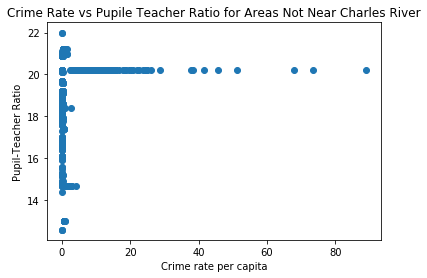

In [53]:
plt.scatter(non_river_bound['CRIM'], non_river_bound['PTRATIO'])
plt.title('Crime Rate vs Pupile Teacher Ratio for Areas Not Near Charles River')
plt.xlabel('Crime rate per capita')
plt.ylabel('Pupil-Teacher Ratio')
plt.show()

There seems to be a very weak relationship between these variables.  They alone cannot be used to predict the other.  We can see, however, that more dangerous neighborhood generally have higher pupil-teacher ratios.

Let's see how other variables relate, such as proportion of black citizens and distance to emplyoment centers.

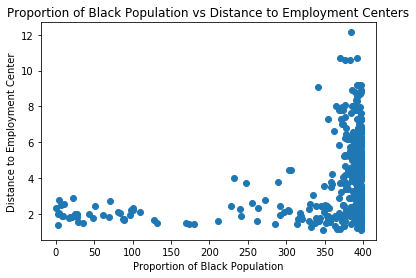

In [62]:
plt.scatter(boston_housing_df['B'], boston_housing_df['DIS'])
plt.title('Proportion of Black Population vs Distance to Employment Centers')
plt.xlabel('Proportion of Black Population')
plt.ylabel('Distance to Employment Center')
plt.show()

Here we can see a stronger relationship.  It seems that neighborhoods that are far from major employments center tend to have higher percentages of black citizens. 

Finally, let's investigate the relationship between the median owner-occupied homes and nitric oxide concentration as well as the relationship between median home value and proportion of non-retail business.

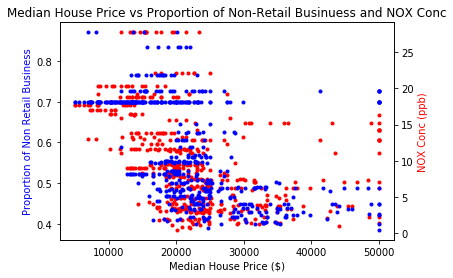

In [89]:
fig, ax1 = plt.subplots()
plt.title("Median House Price vs Proportion of Non-Retail Businuess and NOX Conc")
ax2 = ax1.twinx()
ax1.plot(1000*boston_housing_df['MEDV'], boston_housing_df['NOX'], 'r.')
ax2.plot(1000*boston_housing_df['MEDV'], boston_housing_df['INDUS'], 'b.')
ax1.set_xlabel("Median House Price ($)")
ax1.set_ylabel('Proportion of Non Retail Business', color='b')
ax2.set_ylabel('NOX Conc (ppb)', color='r')
plt.show()

We can see that generally, areas with more expensive homes have a lower non-retail ratio (NRR).  Also, cheaper homes tend to be in areas with higher NOC concentrations. Finally, areas with high NRR tend to have higher NOX concentraions.  This is not surpising, it's understandable that industrial areas would be more polluted.

As an aside, I'd like to see the relationship between home price and average rooms per home.  Surely there will be a relationship, but what's not so obvious is the type of relationship.  Will it be linear? logarithmic? exponential?

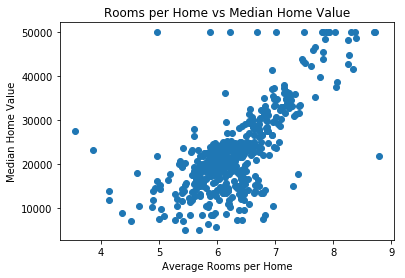

In [93]:
plt.scatter(boston_housing_df['RM'], 1000*boston_housing_df['MEDV'])
plt.title('Rooms per Home vs Median Home Value')
plt.xlabel('Average Rooms per Home')
plt.ylabel('Median Home Value')
plt.show()

The relationship appear to be linear.  We see a weaker relationships among homes with fewer rooms. 